In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

# 1. Chrome 드라이버 설정
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")  # 창 띄우기
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# 2. 사이트 접속
driver.get("https://quotes.toscrape.com")
time.sleep(2)  # 로딩 대기

# 3. "Login" 버튼 클릭
login_link = driver.find_element(By.LINK_TEXT, "Login")
login_link.click()

# 4. 결과 확인용 대기
time.sleep(3)

# driver.quit()

# 웹사이트에서 직접 크롤링

In [1]:
import requests
from bs4 import BeautifulSoup

# 1. URL 설정
url = "http://quotes.toscrape.com/page/1/"

# 2. HTTP 요청
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# 3. 명언과 저자 추출
quotes = soup.find_all("div", class_="quote")

for quote in quotes:
    text = quote.find("span", class_="text").get_text()
    author = quote.find("small", class_="author").get_text()
    print(f"{text} — {author}")

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” — Albert Einstein
“It is our choices, Harry, that show what we truly are, far more than our abilities.” — J.K. Rowling
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” — Albert Einstein
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” — Jane Austen
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” — Marilyn Monroe
“Try not to become a man of success. Rather become a man of value.” — Albert Einstein
“It is better to be hated for what you are than to be loved for what you are not.” — André Gide
“I have not failed. I've just found 10,000 ways that won't work.” — Thomas A. Edison
“A woman is like a tea bag; you never know how strong it is until it's in hot water.” — Eleanor Roos

# NY Times 웹 크로링 (API)

In [6]:
import requests 
import pandas as pd 

API_KEY = 'yfiLGtQ4ktpGR3Ge055arXCqWXRcGkGt'

url = 'https://api.nytimes.com/svc/mostpopular/v2/viewed/1.json'
params = {
    "api-key" : API_KEY
}

response = requests.get(url, params=params)

data = response.json()
df = pd.json_normalize(data['results'])
df.head(1)

,uri,url,id,asset_id,source,published_date,updated,section,subsection,nytdsection,...,byline,type,title,abstract,des_facet,org_facet,per_facet,geo_facet,media,eta_id
0,nyt://article/145cfe92-7c5f-5da3-8ecf-6167d2e7...,https://www.nytimes.com/2025/06/17/nyregion/br...,100000010234457,100000010234457,New York Times,2025-06-17,2025-06-17 18:49:31,New York,,new york,...,By Luis Ferré-Sadurní,Article,Brad Lander Is Arrested by ICE Agents at Immig...,"Mr. Lander, the New York City comptroller and ...","[Immigration and Emigration, Elections, Mayors]","[Immigration and Customs Enforcement (US), Off...","[Lander, Brad]",[],"[{'type': 'image', 'subtype': 'photo', 'captio...",0


# 단일 학교의 1일 급식 정보 가져오기

In [28]:
import requests
import pandas as pd 

EDU_CODE = 'B10'
SCHOOL_CODE = '7021105'
API_KEY = 'd49ee2210c844960846afdf42bea9644'
TARGET_DATE = '20250616' # 수요일

# 학교의 이름 가져오는 함수 
def get_school_name(edu_code, school_code):
    print(f'학교 이름 조회 예정 : 교육청={edu_code}, 학교코드={school_code}')
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY': API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'SD_SCHUL_CODE' : school_code
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"응답코드 : {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "schoolInfo" in data:
                # 여기코드가 핵심
                # name = data["schoolInfo"][1]["row"][0]["SCHUL_NM"]
                name = data['schoolInfo'][1]['row'][0]['SCHUL_NM']
                print(f"학교명: {name}")
                return name
            else:
                print("해당학교는 존재하지 않음", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"학교명 정보 조회 오류 : {e}")
    return "학교명조회불가"
    
def get_meal_info(edu_code, school_code):
    print(f"급식 정보 조회 중: 날짜={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_YMD": TARGET_DATE
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService 응답코드: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"급식 데이터 수: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo 키 없음:", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"급식 정보 조회 오류: {e}")
    return []

# 데이터 수집
school_name = get_school_name(EDU_CODE, SCHOOL_CODE)
meals = get_meal_info(EDU_CODE, SCHOOL_CODE)

data = []
for meal in meals:
    data.append({
        "교육청코드": EDU_CODE,
        "학교코드": SCHOOL_CODE,
        "학교명": school_name,
        "급식일자": meal.get("MLSV_YMD"),
        "식사명": meal.get("MMEAL_SC_NM"),
        "급식식단": meal.get("DDISH_NM")
    })

df = pd.DataFrame(data)
print("수집된 행 수:", len(df))
print(df.head())

df.to_csv("서울_초등학교_급식_20241030.csv", index=False, encoding="utf-8-sig")
print("CSV 저장 완료: 서울_초등학교_급식_20241030.csv")

학교 이름 조회 예정 : 교육청=B10, 학교코드=7021105
응답코드 : 200
학교명: 서울이문초등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 1
수집된 행 수: 1
  교육청코드     학교코드       학교명      급식일자 식사명  \
0   B10  7021105  서울이문초등학교  20250616  중식   

                                                급식식단  
0  귀리밥* <br/>육개장* (1.5.6.16)<br/>시래기된장지짐y (5.6.16...  
CSV 저장 완료: 서울_초등학교_급식_20241030.csv


# 1개의 학교 한달간 데이터 수집
- 날짜만 변경

In [33]:
from datetime import datetime, timedelta
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

FROM_DATE, TO_DATE

('20250519', '20250618')

In [35]:
import requests
import pandas as pd 
from datetime import datetime, timedelta

# 교육청 및 학교 코드
EDU_CODE = 'B10'
SCHOOL_CODE = '7021105'
API_KEY = 'd49ee2210c844960846afdf42bea9644'

# 최근 한달 기간 설정
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

# 학교의 이름 가져오는 함수 
def get_school_name(edu_code, school_code):
    print(f'학교 이름 조회 예정 : 교육청={edu_code}, 학교코드={school_code}')
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY': API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'SD_SCHUL_CODE' : school_code
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"응답코드 : {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "schoolInfo" in data:
                # 여기코드가 핵심
                # name = data["schoolInfo"][1]["row"][0]["SCHUL_NM"]
                name = data['schoolInfo'][1]['row'][0]['SCHUL_NM']
                print(f"학교명: {name}")
                return name
            else:
                print("해당학교는 존재하지 않음", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"학교명 정보 조회 오류 : {e}")
    return "학교명조회불가"
    
def get_meal_info(edu_code, school_code, from_date, to_date):
    print(f"급식 정보 조회 중: 날짜={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_FROM_YMD": from_date, 
        "MLSV_TO_YMD" : to_date, 
        "pIndex" : 1, 
        "pSize" : 100
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService 응답코드: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"급식 데이터 수: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo 키 없음:", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"급식 정보 조회 오류: {e}")
    return []

# 데이터 수집
school_name = get_school_name(EDU_CODE, SCHOOL_CODE)
meals = get_meal_info(EDU_CODE, SCHOOL_CODE, FROM_DATE, TO_DATE)

data = []
for meal in meals:
    data.append({
        "교육청코드": EDU_CODE,
        "학교코드": SCHOOL_CODE,
        "학교명": school_name,
        "급식일자": meal.get("MLSV_YMD"),
        "식사명": meal.get("MMEAL_SC_NM"),
        "급식식단": meal.get("DDISH_NM")
    })

df = pd.DataFrame(data)
print("수집된 행 수:", len(df))
print(df.head())

# df.to_csv("서울_초등학교_급식_20241030.csv", index=False, encoding="utf-8-sig")
# print("CSV 저장 완료: 서울_초등학교_급식_20241030.csv")

학교 이름 조회 예정 : 교육청=B10, 학교코드=7021105
응답코드 : 200
학교명: 서울이문초등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
수집된 행 수: 21
  교육청코드     학교코드       학교명      급식일자 식사명  \
0   B10  7021105  서울이문초등학교  20250519  중식   
1   B10  7021105  서울이문초등학교  20250520  중식   
2   B10  7021105  서울이문초등학교  20250521  중식   
3   B10  7021105  서울이문초등학교  20250522  중식   
4   B10  7021105  서울이문초등학교  20250523  중식   

                                                급식식단  
0  차수수밥* <br/>김치콩나물국^ (5.6.9)<br/>오이볶음 (5)<br/>순살...  
1  강황밥 <br/>감자옹심이국 (5.6.17)<br/>미역줄기볶음* (5)<br/>오...  
2  부지갱이나물밥&양념장 (5.6.13)<br/>북어계란국* (1.5.6)<br/>비름...  
3  귀리밥* <br/>호박잎된장국y (5.6.18)<br/>참나물무침* (5.6)<br...  
4  발아현미밥 <br/>어묵국y (1.2.5.6.7.8.13.16.18)<br/>고춧잎...  


# 서울에 있는 모든 고등학교 최근 1개월 데이터 수집
- 가장 중요한 건, 학교명과 학교코드가 필요

In [47]:
import requests 
import pandas as pd 
from datetime import datetime, timedelta 
from tqdm import tqdm
import time 

EDU_CODE = 'B10'
API_KEY = 'd49ee2210c844960846afdf42bea9644'

# 최근 한달 기간 설정
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

# 고등학교만 조회
def get_highschools(edu_code):
    url = 'https://open.neis.go.kr/hub/schoolInfo'
    params = {
        'KEY': API_KEY, 
        'Type' : 'json', 
        'ATPT_OFCDC_SC_CODE' : edu_code, 
        'pIndex': 1, 
        'pSize': 1000
    }
    highschools = []
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"응답코드 : {res.status_code}")
        if res.status_code == 200 and 'schoolInfo' in res.json():
            rows = res.json()['schoolInfo'][1]['row']
            for row in rows:
                if row.get('SCHUL_KND_SC_NM') == '고등학교':
                    highschools.append((row['SD_SCHUL_CODE'], row['SCHUL_NM']))
                else:
                    pass
        else:
            print("200은 뜨나, schoolinfo은 없음")
    except Exception as e:
        print("고등학교 목록 오류: {e}")
    return highschools



응답코드 : 200


178

In [51]:
highschool_list = get_highschools(EDU_CODE)

# 최근 한달 기간 설정
today = datetime.today()
one_month_ago = today - timedelta(days=30)
FROM_DATE = one_month_ago.strftime('%Y%m%d')
TO_DATE = today.strftime('%Y%m%d')

def get_meal_info(edu_code, school_code, from_date, to_date):
    print(f"급식 정보 조회 중: 날짜={TARGET_DATE}")
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"
    params = {
        "KEY": API_KEY,
        "Type": "json",
        "ATPT_OFCDC_SC_CODE": edu_code,
        "SD_SCHUL_CODE": school_code,
        "MLSV_FROM_YMD": from_date, 
        "MLSV_TO_YMD" : to_date, 
        "pIndex" : 1, 
        "pSize" : 100
    }
    try:
        res = requests.get(url, params=params, timeout=5)
        print(f"mealService 응답코드: {res.status_code}")
        if res.status_code == 200:
            data = res.json()
            if "mealServiceDietInfo" in data:
                print(f"급식 데이터 수: {len(data['mealServiceDietInfo'][1]['row'])}")
                return data["mealServiceDietInfo"][1]["row"]
            else:
                print("mealServiceDietInfo 키 없음:", data)
        else:
            print("응답 실패:", res.text)
    except Exception as e:
        print(f"급식 정보 조회 오류: {e}")
    return []

all_data = []
for school_code, school_name in tqdm(highschool_list, desc="고등학교 급식 조회"):
    print(school_code, school_name)
    meals = get_meal_info(EDU_CODE, school_code, FROM_DATE, TO_DATE)
    for meal in meals:
        all_data.append({
            "교육청코드": EDU_CODE,
            "학교코드": school_code,
            "학교명": school_name,
            "급식일자": meal.get("MLSV_YMD"),
            "식사명": meal.get("MMEAL_SC_NM"),
            "급식식단": meal.get("DDISH_NM")
        })
    time.sleep(0.1)

# 저장
df = pd.DataFrame(all_data)
print("수집된 급식 행 수:", len(df))
print(df.head())

응답코드 : 200


고등학교 급식 조회:   1%|▎                                              | 1/178 [00:00<00:33,  5.28it/s]

7010057 가락고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7011169 가재울고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:   1%|▌                                              | 2/178 [00:00<00:34,  5.11it/s]

7010117 강동고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:   2%|█                                              | 4/178 [00:00<00:35,  4.84it/s]

7010118 강서고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 42


고등학교 급식 조회:   3%|█▎                                             | 5/178 [00:01<00:35,  4.84it/s]

7010958 강일고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010058 개포고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:   3%|█▌                                             | 6/178 [00:01<00:35,  4.85it/s]

7010119 건국대학교사범대학부속고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:   4%|█▊                                             | 7/178 [00:01<00:36,  4.68it/s]

7010059 경기고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 36


고등학교 급식 조회:   5%|██▍                                            | 9/178 [00:01<00:35,  4.80it/s]

7010271 경기기계공업고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 59


고등학교 급식 조회:   6%|██▌                                           | 10/178 [00:02<00:34,  4.90it/s]

7010272 경기상업고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7010060 경기여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:   7%|███                                           | 12/178 [00:02<00:33,  4.93it/s]

7010061 경동고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010120 경문고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:   8%|███▌                                          | 14/178 [00:02<00:33,  4.88it/s]

7010062 경복고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010835 경복비즈니스고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 36


고등학교 급식 조회:   8%|███▉                                          | 15/178 [00:03<00:34,  4.72it/s]

7010122 경복여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 36


고등학교 급식 조회:   9%|████▏                                         | 16/178 [00:03<00:34,  4.66it/s]

7010124 경성고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  10%|████▍                                         | 17/178 [00:03<00:34,  4.71it/s]

7010125 경신고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  11%|████▉                                         | 19/178 [00:03<00:32,  4.85it/s]

7010563 경인고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  11%|█████▏                                        | 20/178 [00:04<00:32,  4.92it/s]

7010698 경일고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010126 경희고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  12%|█████▋                                        | 22/178 [00:04<00:31,  4.90it/s]

7010127 경희여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 38
7011312 계성고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  13%|█████▉                                        | 23/178 [00:04<00:32,  4.72it/s]

7010797 고려대학교사범대학부속고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  13%|██████▏                                       | 24/178 [00:05<00:37,  4.07it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7011487 고명외식고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  15%|██████▋                                       | 26/178 [00:05<00:32,  4.68it/s]

7010063 고척고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  15%|██████▉                                       | 27/178 [00:05<00:31,  4.78it/s]

7010064 공항고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7010065 관악고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  16%|███████▍                                      | 29/178 [00:06<00:31,  4.80it/s]

7010066 광남고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 40
7010131 광문고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 33


고등학교 급식 조회:  17%|███████▊                                      | 30/178 [00:06<00:31,  4.69it/s]

7010132 광성고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 59


고등학교 급식 조회:  18%|████████▎                                     | 32/178 [00:06<00:30,  4.73it/s]

7010133 광신고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7011488 광신방송예술고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  19%|████████▌                                     | 33/178 [00:06<00:28,  5.04it/s]

mealService 응답코드: 200
급식 데이터 수: 8
7010067 광양고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  19%|████████▊                                     | 34/178 [00:07<00:27,  5.20it/s]

7010134 광영고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  20%|█████████                                     | 35/178 [00:07<00:29,  4.84it/s]

7010135 광영여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  20%|█████████▎                                    | 36/178 [00:07<00:31,  4.57it/s]

7011505 광운인공지능고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 18


고등학교 급식 조회:  21%|█████████▊                                    | 38/178 [00:07<00:28,  4.84it/s]

7010068 구로고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  22%|██████████                                    | 39/178 [00:08<00:28,  4.91it/s]

7011111 구암고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010069 구일고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  23%|██████████▌                                   | 41/178 [00:08<00:28,  4.85it/s]

7010827 구현고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  24%|██████████▊                                   | 42/178 [00:08<00:28,  4.84it/s]

1371661 국립국악고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
1371663 국립전통예술고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  25%|███████████▎                                  | 44/178 [00:09<00:27,  4.87it/s]

7010071 금옥여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010072 금천고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  25%|███████████▋                                  | 45/178 [00:09<00:27,  4.90it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7011319 금호고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  26%|███████████▉                                  | 46/178 [00:09<00:27,  4.80it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010136 남강고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  26%|████████████▏                                 | 47/178 [00:09<00:28,  4.65it/s]

mealService 응답코드: 200
급식 데이터 수: 39
7010564 노원고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  28%|████████████▋                                 | 49/178 [00:10<00:25,  5.05it/s]

7010589 누원고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  28%|████████████▉                                 | 50/178 [00:10<00:25,  5.01it/s]

7011489 단국대학교부속소프트웨어고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  29%|█████████████▏                                | 51/178 [00:10<00:25,  5.00it/s]

7010137 단국대학교사범대학부속고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010073 당곡고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  29%|█████████████▍                                | 52/178 [00:10<00:26,  4.81it/s]

7011507 대경생활과학고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  30%|█████████████▋                                | 53/178 [00:11<00:25,  4.88it/s]

7010138 대광고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 42


고등학교 급식 조회:  31%|██████████████▏                               | 55/178 [00:11<00:25,  4.86it/s]

7010833 대동세무고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  31%|██████████████▍                               | 56/178 [00:11<00:23,  5.11it/s]

7010139 대성고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010140 대신고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  32%|██████████████▋                               | 57/178 [00:11<00:23,  5.08it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010074 대영고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  33%|██████████████▉                               | 58/178 [00:12<00:27,  4.29it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010141 대원고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  33%|███████████████▏                              | 59/178 [00:12<00:26,  4.48it/s]

mealService 응답코드: 200
급식 데이터 수: 35
7010142 대원여자고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  34%|███████████████▌                              | 60/178 [00:12<00:26,  4.39it/s]

mealService 응답코드: 200
급식 데이터 수: 35
7010143 대원외국어고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 35


고등학교 급식 조회:  35%|████████████████                              | 62/178 [00:13<00:25,  4.52it/s]

7010144 대일고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  35%|████████████████▎                             | 63/178 [00:13<00:24,  4.74it/s]

7011186 대일관광고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010145 대일외국어고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 59


고등학교 급식 조회:  37%|████████████████▊                             | 65/178 [00:13<00:25,  4.47it/s]

7010146 대진고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 39


고등학교 급식 조회:  37%|█████████████████                             | 66/178 [00:13<00:24,  4.59it/s]

7010740 대진디자인고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  38%|█████████████████▎                            | 67/178 [00:14<00:23,  4.69it/s]

7010147 대진여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  38%|█████████████████▌                            | 68/178 [00:14<00:23,  4.76it/s]

7010148 덕성여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 36


고등학교 급식 조회:  39%|█████████████████▊                            | 69/178 [00:14<00:22,  4.82it/s]

7010808 덕수고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010149 덕원여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  39%|██████████████████                            | 70/178 [00:14<00:22,  4.73it/s]

7010150 덕원예술고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  40%|██████████████████▌                           | 72/178 [00:15<00:21,  4.92it/s]

7010317 덕일전자공업고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7011318 도선고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  41%|██████████████████▊                           | 73/178 [00:15<00:21,  4.88it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010560 독산고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  42%|███████████████████▍                          | 75/178 [00:15<00:20,  4.93it/s]

7011586 동국대학교사범대학부속가람고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 42
7010151 동국대학교사범대학부속고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  43%|███████████████████▉                          | 77/178 [00:16<00:21,  4.74it/s]

7010152 동덕여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  44%|████████████████████▏                         | 78/178 [00:16<00:19,  5.01it/s]

7011490 동명생활경영고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7010153 동명여자고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  44%|████████████████████▍                         | 79/178 [00:16<00:20,  4.95it/s]

mealService 응답코드: 200
급식 데이터 수: 20
7010154 동북고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  45%|████████████████████▋                         | 80/178 [00:16<00:19,  4.91it/s]

7010155 동성고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 63


고등학교 급식 조회:  46%|████████████████████▉                         | 81/178 [00:17<00:21,  4.48it/s]

7010965 동양고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  47%|█████████████████████▍                        | 83/178 [00:17<00:19,  4.77it/s]

7010156 동일여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7010075 동작고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  47%|█████████████████████▋                        | 84/178 [00:17<00:19,  4.89it/s]

mealService 응답코드: 200
급식 데이터 수: 20
7010076 둔촌고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  48%|█████████████████████▉                        | 85/178 [00:17<00:18,  4.95it/s]

7010700 등촌고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  49%|██████████████████████▍                       | 87/178 [00:18<00:18,  4.89it/s]

7010908 리라아트고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19


고등학교 급식 조회:  49%|██████████████████████▋                       | 88/178 [00:18<00:18,  4.93it/s]

7010157 마포고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  50%|███████████████████████                       | 89/178 [00:18<00:17,  4.96it/s]

7010077 면목고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 22
7010158 명덕고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 69


고등학교 급식 조회:  51%|███████████████████████▎                      | 90/178 [00:18<00:18,  4.76it/s]

7010159 명덕여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 69


고등학교 급식 조회:  51%|███████████████████████▌                      | 91/178 [00:19<00:18,  4.60it/s]

7010160 명덕외국어고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 69


고등학교 급식 조회:  52%|████████████████████████                      | 93/178 [00:19<00:17,  4.84it/s]

7010078 명일여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010163 명지고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  53%|████████████████████████▎                     | 94/178 [00:19<00:17,  4.80it/s]

7010744 목동고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  54%|████████████████████████▊                     | 96/178 [00:20<00:17,  4.82it/s]

7010079 무학여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
mealServiceDietInfo 키 없음: {'RESULT': {'CODE': 'INFO-200', 'MESSAGE': '해당하는 데이터가 없습니다.'}}
7010166 문일고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 42


고등학교 급식 조회:  54%|█████████████████████████                     | 97/178 [00:20<00:18,  4.46it/s]

7010701 문정고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  56%|█████████████████████████▌                    | 99/178 [00:20<00:16,  4.73it/s]

7010959 문현고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7010591 미래산업과학고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  56%|█████████████████████████▎                   | 100/178 [00:21<00:16,  4.69it/s]

7011569 미림마이스터고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 58


고등학교 급식 조회:  57%|█████████████████████████▌                   | 101/178 [00:21<00:16,  4.75it/s]

7010167 미림여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 58


고등학교 급식 조회:  57%|█████████████████████████▊                   | 102/178 [00:21<00:16,  4.58it/s]

7010080 반포고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  58%|██████████████████████████▎                  | 104/178 [00:21<00:15,  4.80it/s]

7010590 방산고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010168 배명고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 62


고등학교 급식 조회:  59%|██████████████████████████▌                  | 105/178 [00:22<00:15,  4.57it/s]

7010169 배문고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  60%|██████████████████████████▊                  | 106/178 [00:22<00:15,  4.52it/s]

7010170 배재고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 62


고등학교 급식 조회:  61%|███████████████████████████▎                 | 108/178 [00:22<00:15,  4.55it/s]

7010171 배화여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41
7010172 백암고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 35


고등학교 급식 조회:  61%|███████████████████████████▌                 | 109/178 [00:22<00:14,  4.62it/s]

7010173 보성고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회:  62%|███████████████████████████▊                 | 110/178 [00:23<00:14,  4.54it/s]

7010174 보성여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  62%|████████████████████████████                 | 111/178 [00:23<00:14,  4.65it/s]

7010813 보인고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 59


고등학교 급식 조회:  63%|████████████████████████████▌                | 113/178 [00:23<00:13,  4.76it/s]

7010736 불암고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  64%|████████████████████████████▊                | 114/178 [00:24<00:13,  4.75it/s]

7010985 삼각산고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19
7010081 삼성고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  65%|█████████████████████████████▎               | 116/178 [00:24<00:12,  4.84it/s]

7010082 상계고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  66%|█████████████████████████████▌               | 117/178 [00:24<00:12,  5.02it/s]

7010593 상명고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010178 상명대학교사범대학부속여자고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  66%|█████████████████████████████▊               | 118/178 [00:24<00:12,  5.00it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010179 상문고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  67%|██████████████████████████████▎              | 120/178 [00:25<00:11,  5.16it/s]

7010806 상암고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010916 상일미디어고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  68%|██████████████████████████████▌              | 121/178 [00:25<00:10,  5.24it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010181 상일여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  69%|███████████████████████████████              | 123/178 [00:25<00:10,  5.06it/s]

7010182 서라벌고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 35
7010183 서문여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 37


고등학교 급식 조회:  70%|███████████████████████████████▌             | 125/178 [00:26<00:10,  4.98it/s]

7010721 서서울생활과학고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7010083 서울고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  71%|███████████████████████████████▊             | 126/178 [00:26<00:11,  4.62it/s]

7010278 서울공업고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19


고등학교 급식 조회:  71%|████████████████████████████████             | 127/178 [00:26<00:11,  4.52it/s]

7010906 서울공연예술고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  72%|████████████████████████████████▎            | 128/178 [00:26<00:11,  4.48it/s]

7010084 서울과학고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 60


고등학교 급식 조회:  72%|████████████████████████████████▌            | 129/178 [00:27<00:10,  4.46it/s]

7010739 서울관광고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19


고등학교 급식 조회:  73%|████████████████████████████████▊            | 130/178 [00:27<00:10,  4.49it/s]

7010817 서울국제고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 58


고등학교 급식 조회:  74%|█████████████████████████████████▎           | 132/178 [00:27<00:10,  4.43it/s]

7010964 서울금융고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7011109 서울대학교사범대학부설고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  75%|█████████████████████████████████▌           | 133/178 [00:28<00:10,  4.46it/s]

7011180 서울도시과학기술고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 54


고등학교 급식 조회:  76%|██████████████████████████████████▏          | 135/178 [00:28<00:09,  4.49it/s]

7011539 서울동구고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19
7011494 서울동산고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  77%|██████████████████████████████████▋          | 137/178 [00:28<00:08,  4.59it/s]

7010741 서울디자인고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  78%|██████████████████████████████████▉          | 138/178 [00:29<00:08,  4.84it/s]

7011585 서울디지털콘텐츠고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  78%|███████████████████████████████████▏         | 139/178 [00:29<00:07,  5.06it/s]

7010572 서울디지텍고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010738 서울로봇고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  79%|███████████████████████████████████▍         | 140/178 [00:29<00:08,  4.55it/s]

mealService 응답코드: 200
급식 데이터 수: 62
7011506 서울매그넷고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  79%|███████████████████████████████████▋         | 141/178 [00:29<00:07,  4.76it/s]

7010697 서울문영여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  80%|███████████████████████████████████▉         | 142/178 [00:29<00:07,  4.70it/s]

7010888 서울문화고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19


고등학교 급식 조회:  81%|████████████████████████████████████▍        | 144/178 [00:30<00:06,  4.94it/s]

7010185 서울미술고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 18
7011575 서울반도체고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  81%|████████████████████████████████████▋        | 145/178 [00:30<00:06,  4.88it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010836 서울방송고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  83%|█████████████████████████████████████▏       | 147/178 [00:30<00:06,  5.14it/s]

7011584 서울백영고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 17
7010186 서울세종고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  83%|█████████████████████████████████████▍       | 148/178 [00:31<00:05,  5.02it/s]

7011492 서울신정고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  84%|█████████████████████████████████████▉       | 150/178 [00:31<00:05,  4.95it/s]

7010960 서울아이티고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  85%|██████████████████████████████████████▏      | 151/178 [00:31<00:05,  4.91it/s]

7010085 서울여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 41


고등학교 급식 조회:  85%|██████████████████████████████████████▍      | 152/178 [00:31<00:05,  5.04it/s]

7010340 서울여자상업고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7010795 서울영상고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 55


고등학교 급식 조회:  87%|██████████████████████████████████████▉      | 154/178 [00:32<00:04,  4.91it/s]

7010187 서울예술고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 30


고등학교 급식 조회:  87%|███████████████████████████████████████▏     | 155/178 [00:32<00:04,  4.89it/s]

7010188 서울외국어고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 37
7011558 서울웹툰애니메이션고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 18


고등학교 급식 조회:  88%|███████████████████████████████████████▋     | 157/178 [00:33<00:04,  4.97it/s]

7011486 서울의료보건고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7011498 서울인공지능고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  89%|████████████████████████████████████████▏    | 159/178 [00:33<00:03,  5.11it/s]

7011513 서울정화고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010086 서울체육고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  90%|████████████████████████████████████████▍    | 160/178 [00:33<00:03,  4.87it/s]

mealService 응답코드: 200
급식 데이터 수: 52
7011213 서울컨벤션고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  91%|████████████████████████████████████████▉    | 162/178 [00:33<00:03,  5.26it/s]

7011491 서일문화예술고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 16
7010087 서초고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  92%|█████████████████████████████████████████▏   | 163/178 [00:34<00:02,  5.27it/s]

mealService 응답코드: 200
급식 데이터 수: 19
7010088 석관고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  92%|█████████████████████████████████████████▍   | 164/178 [00:34<00:02,  5.00it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010189 선덕고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  93%|█████████████████████████████████████████▋   | 165/178 [00:34<00:02,  4.65it/s]

mealService 응답코드: 200
급식 데이터 수: 43
7010536 선린인터넷고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19


고등학교 급식 조회:  93%|█████████████████████████████████████████▉   | 166/178 [00:34<00:02,  4.95it/s]

7010984 선사고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  94%|██████████████████████████████████████████▍  | 168/178 [00:35<00:01,  5.06it/s]

7010734 선유고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20
7011508 선일빅데이터고등학교
급식 정보 조회 중: 날짜=20250616


고등학교 급식 조회:  95%|██████████████████████████████████████████▋  | 169/178 [00:35<00:01,  4.99it/s]

mealService 응답코드: 200
급식 데이터 수: 21
7010190 선일여자고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21


고등학교 급식 조회:  96%|██████████████████████████████████████████▉  | 170/178 [00:35<00:01,  5.03it/s]

7010191 선정고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 40


고등학교 급식 조회:  97%|███████████████████████████████████████████▍ | 172/178 [00:36<00:01,  4.89it/s]

7011315 선정국제관광고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 40
7010192 선화예술고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 62


고등학교 급식 조회:  98%|███████████████████████████████████████████▉ | 174/178 [00:36<00:00,  4.61it/s]

7010193 성남고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19


고등학교 급식 조회:  98%|████████████████████████████████████████████▏| 175/178 [00:36<00:00,  4.68it/s]

7011179 성덕고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 21
7010089 성동고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 20


고등학교 급식 조회:  99%|████████████████████████████████████████████▍| 176/178 [00:36<00:00,  4.71it/s]

7010737 성동공업고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 38


고등학교 급식 조회: 100%|█████████████████████████████████████████████| 178/178 [00:37<00:00,  4.82it/s]

7010889 성동글로벌경영고등학교
급식 정보 조회 중: 날짜=20250616
mealService 응답코드: 200
급식 데이터 수: 19


고등학교 급식 조회: 100%|█████████████████████████████████████████████| 178/178 [00:37<00:00,  4.77it/s]

수집된 급식 행 수: 5222
  교육청코드     학교코드     학교명      급식일자 식사명  \
0   B10  7010057  가락고등학교  20250519  중식   
1   B10  7010057  가락고등학교  20250520  중식   
2   B10  7010057  가락고등학교  20250521  중식   
3   B10  7010057  가락고등학교  20250522  중식   
4   B10  7010057  가락고등학교  20250523  중식   

                                                급식식단  
0  쌀밥 <br/>소고기미역국 (2.5.6.15.16.18)<br/>돼지갈비찜 (5.6...  
1  쇠고기콩나물밥 (5.6.16)<br/>물만두국 (1.2.5.6.10.15.16.18...  
2  새우볶음밥 (1.5.6.8.9.13.18)<br/>씨앗호떡파이 (1.2.3.5.6)...  
3  쌀밥 <br/>볶음우동 (5.6.8.9.13.15.17.18)<br/>zero초코파...  
4  현미밥 <br/>어묵국 (1.2.5.6.15.16.18)<br/>마라찜닭 (5.6....  


In [52]:
df.to_csv("서울_고등학교 전체_급식_최근1개월.csv", index=False, encoding="utf-8-sig")

# 4교시 미션
- 전국시도교육청 기반으로 고등학교 전체 급식데이터 수집
- ChatGPT 사용하지 않고 진행 (반복문~반복문~조건문, 기초문법 확장한 개념)

In [54]:
# 필요한 라이브러리 임포트
import requests  # HTTP 요청을 위한 라이브러리
import pandas as pd  # 데이터 처리를 위한 라이브러리
from datetime import datetime, timedelta  # 날짜/시간 처리를 위한 라이브러리
from tqdm import tqdm  # 진행률 표시를 위한 라이브러리
from concurrent.futures import ThreadPoolExecutor, as_completed  # 병렬 처리를 위한 라이브러리

# 전국 교육청 코드 리스트 (17개 시도교육청)
# B10: 서울, C10: 부산, D10: 대구, E10: 인천, F10: 광주, G10: 대전, H10: 울산
# I10: 세종, J10: 경기, K10: 강원, M10: 충북, N10: 충남, P10: 전북, Q10: 전남, R10: 경북, S10: 경남, T10: 제주
EDU_CODES = [
    "B10", "C10", "D10", "E10", "F10", "G10", "H10", "I10", "J10",
    "K10", "M10", "N10", "P10", "Q10", "R10", "S10", "T10"
]

# NEIS Open API 인증키
API_KEY = "d49ee2210c844960846afdf42bea9644"

# 수집 기간 설정 (최근 1개월)
today = datetime.today()  # 오늘 날짜
one_month_ago = today - timedelta(days=30)  # 30일 전 날짜
FROM_DATE = one_month_ago.strftime("%Y%m%d")  # 시작일 (YYYYMMDD 형식)
TO_DATE = today.strftime("%Y%m%d")  # 종료일 (YYYYMMDD 형식)

def get_highschools(edu_code):
    """
    특정 교육청의 고등학교 목록을 수집하는 함수
    
    Args:
        edu_code (str): 교육청 코드 (예: "B10" for 서울)
    
    Returns:
        list: (교육청코드, 학교코드, 학교명) 튜플의 리스트
    """
    url = "https://open.neis.go.kr/hub/schoolInfo"  # NEIS 학교정보 API 엔드포인트
    params = {
        "KEY": API_KEY,  # API 인증키
        "Type": "json",  # 응답 형식
        "ATPT_OFCDC_SC_CODE": edu_code,  # 교육청 코드
        "pIndex": 1,  # 페이지 번호
        "pSize": 1000  # 페이지당 데이터 수
    }
    highschools = []
    try:
        # API 요청 실행
        res = requests.get(url, params=params, timeout=5)
        # 응답이 성공이고 schoolInfo 데이터가 있는 경우
        if res.status_code == 200 and "schoolInfo" in res.json():
            for row in res.json()["schoolInfo"][1]["row"]:
                # 고등학교만 필터링
                if row.get("SCHUL_KND_SC_NM") == "고등학교":
                    highschools.append((edu_code, row["SD_SCHUL_CODE"], row["SCHUL_NM"]))
    except Exception as e:
        print(f"🚨 {edu_code} 고등학교 목록 오류: {e}")
    return highschools

def fetch_meal_data(edu_code, school_code, school_name):
    """
    특정 학교의 급식 정보를 수집하는 함수 (병렬 처리 대상)
    
    Args:
        edu_code (str): 교육청 코드
        school_code (str): 학교 코드
        school_name (str): 학교명
    
    Returns:
        list: 급식 정보 딕셔너리의 리스트
    """
    url = "https://open.neis.go.kr/hub/mealServiceDietInfo"  # NEIS 급식정보 API 엔드포인트
    params = {
        "KEY": API_KEY,  # API 인증키
        "Type": "json",  # 응답 형식
        "ATPT_OFCDC_SC_CODE": edu_code,  # 교육청 코드
        "SD_SCHUL_CODE": school_code,  # 학교 코드
        "MLSV_FROM_YMD": FROM_DATE,  # 급식 시작일
        "MLSV_TO_YMD": TO_DATE,  # 급식 종료일
        "pIndex": 1,  # 페이지 번호
        "pSize": 100  # 페이지당 데이터 수
    }
    try:
        # API 요청 실행
        res = requests.get(url, params=params, timeout=5)
        # 응답이 성공이고 mealServiceDietInfo 데이터가 있는 경우
        if res.status_code == 200 and "mealServiceDietInfo" in res.json():
            meals = res.json()["mealServiceDietInfo"][1]["row"]
            # 급식 데이터를 딕셔너리 형태로 변환
            return [
                {
                    "교육청코드": edu_code,
                    "학교코드": school_code,
                    "학교명": school_name,
                    "급식일자": meal.get("MLSV_YMD"),  # 급식 날짜
                    "식사명": meal.get("MMEAL_SC_NM"),  # 식사 구분 (아침, 점심, 저녁)
                    "급식식단": meal.get("DDISH_NM")  # 급식 메뉴
                }
                for meal in meals
            ]
    except:
        pass  # 오류 발생 시 빈 리스트 반환
    return []

# 전국 고등학교 목록 수집 (순차 처리)
all_highschools = []
for edu_code in tqdm(EDU_CODES, desc="📚 교육청별 고등학교 수집"):
    all_highschools.extend(get_highschools(edu_code))

print(f"전체 고등학교 수: {len(all_highschools)}")

# 급식 정보 병렬 수집 시작
results = []
with ThreadPoolExecutor(max_workers=20) as executor:  # 최대 20개 스레드로 병렬 처리
    # 모든 학교에 대해 급식 정보 수집 작업 제출
    futures = [
        executor.submit(fetch_meal_data, edu, sch_code, sch_name)
        for edu, sch_code, sch_name in all_highschools
    ]
    # 완료된 작업들의 결과를 수집
    for future in tqdm(as_completed(futures), total=len(futures), desc="🍱 급식 정보 병렬 수집"):
        result = future.result()
        if result:  # 결과가 있는 경우만 추가
            results.extend(result)

# 수집된 데이터를 DataFrame으로 변환
df = pd.DataFrame(results)
print("수집된 전체 급식 행 수:", len(df))
print(df.head())  # 처음 5행 출력

# CSV 파일로 저장 (UTF-8 BOM 인코딩으로 한글 깨짐 방지)
df.to_csv("전국_고등학교_최근1개월급식_병렬처리.csv", index=False, encoding="utf-8-sig")
print("CSV 저장 완료: 전국_고등학교_최근1개월급식_병렬처리.csv")

📚 교육청별 고등학교 수집:  18%|███████▏                                 | 3/17 [00:05<00:34,  2.47s/it]

🚨 D10 고등학교 목록 오류: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Read timed out.


📚 교육청별 고등학교 수집:  24%|█████████▋                               | 4/17 [00:10<00:45,  3.48s/it]

🚨 E10 고등학교 목록 오류: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=E10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB16FA5D50>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


📚 교육청별 고등학교 수집:  29%|████████████                             | 5/17 [00:15<00:48,  4.03s/it]

🚨 F10 고등학교 목록 오류: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=F10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB1741D290>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


📚 교육청별 고등학교 수집:  35%|██████████████▍                          | 6/17 [00:20<00:48,  4.36s/it]

🚨 G10 고등학교 목록 오류: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=G10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB17438850>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


📚 교육청별 고등학교 수집:  41%|████████████████▉                        | 7/17 [00:25<00:45,  4.58s/it]

🚨 H10 고등학교 목록 오류: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=H10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB16F4F4D0>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


📚 교육청별 고등학교 수집:  47%|███████████████████▎                     | 8/17 [00:30<00:42,  4.71s/it]

🚨 I10 고등학교 목록 오류: HTTPSConnectionPool(host='open.neis.go.kr', port=443): Max retries exceeded with url: /hub/schoolInfo?KEY=d49ee2210c844960846afdf42bea9644&Type=json&ATPT_OFCDC_SC_CODE=I10&pIndex=1&pSize=1000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001BB174F9A10>, 'Connection to open.neis.go.kr timed out. (connect timeout=5)'))


📚 교육청별 고등학교 수집: 100%|████████████████████████████████████████| 17/17 [00:33<00:00,  2.00s/it]


전체 고등학교 수: 1508


🍱 급식 정보 병렬 수집: 100%|███████████████████████████████████████| 1508/1508 [02:50<00:00,  8.86it/s]


수집된 전체 급식 행 수: 38964
  교육청코드     학교코드       학교명      급식일자 식사명  \
0   B10  7010272  경기상업고등학교  20250519  중식   
1   B10  7010272  경기상업고등학교  20250520  중식   
2   B10  7010272  경기상업고등학교  20250521  중식   
3   B10  7010272  경기상업고등학교  20250522  중식   
4   B10  7010272  경기상업고등학교  20250523  중식   

                                                급식식단  
0  하이라이스 (1.2.5.6.10.12.16)<br/>페스츄링도그 (1.2.5.6.1...  
1  흑미밥 <br/>들깨수제비국 (5.6.8.9.18)<br/>매운돼지갈비찜 (5.6....  
2  베이컨김치볶음밥 (2.5.6.9.10.13.18)<br/>유부장국 (5.6.8.9....  
3  현미밥 <br/>사골우거지국 (5.6.13.16)<br/>양배추찜*쌈장 (5.6.1...  
4  차수수밥 <br/>오징어무국 (8.9.17.18)<br/>닭볶음탕 (6.13.15....  
CSV 저장 완료: 전국_고등학교_최근1개월급식_병렬처리.csv


# 간단 워드 클라우드 작성

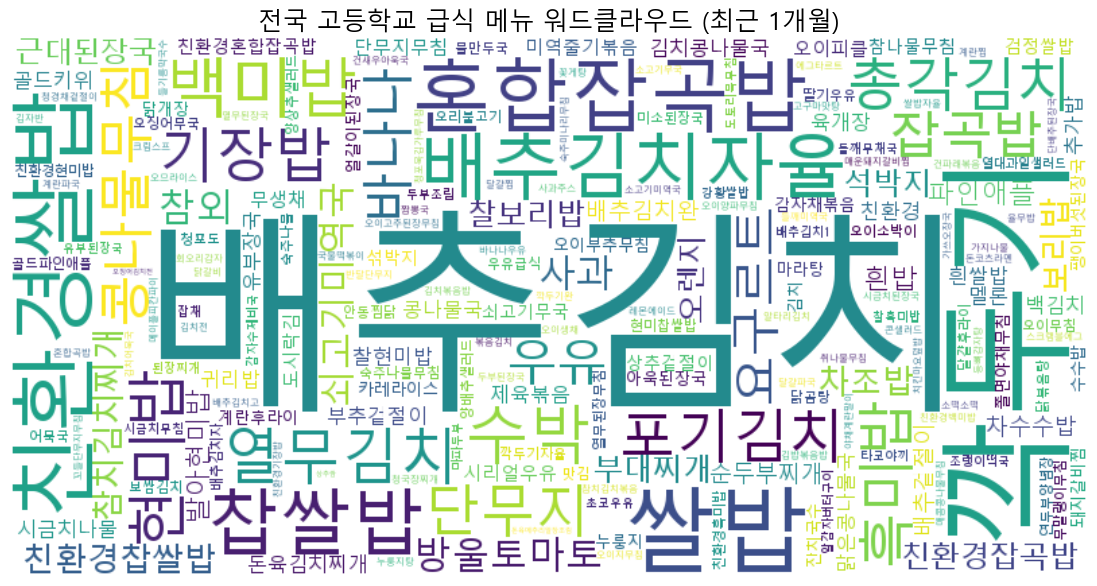

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 메뉴 전처리 함수 (이미 실행한 경우 생략 가능)
def preprocess_menu_text(text_series):
    text_series = text_series.dropna().str.replace("<br/>", " ").str.replace("<br />", " ")
    words = text_series.str.split().explode()
    words = words[~words.str.contains(r"^\(.*\)$")]
    words = words.str.replace(r"[^\uAC00-\uD7A3a-zA-Z0-9]", "", regex=True)
    words = words[words.str.len() > 1]
    return words

# 전처리 + 빈도수 계산
words = preprocess_menu_text(df["급식식단"])
freq_dict = Counter(words)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # ⬅️ Windows 기준 맑은 고딕 경로
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(freq_dict)

# 시각화
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("전국 고등학교 급식 메뉴 워드클라우드 (최근 1개월)", fontsize=18, fontname='Malgun Gothic')
plt.show()

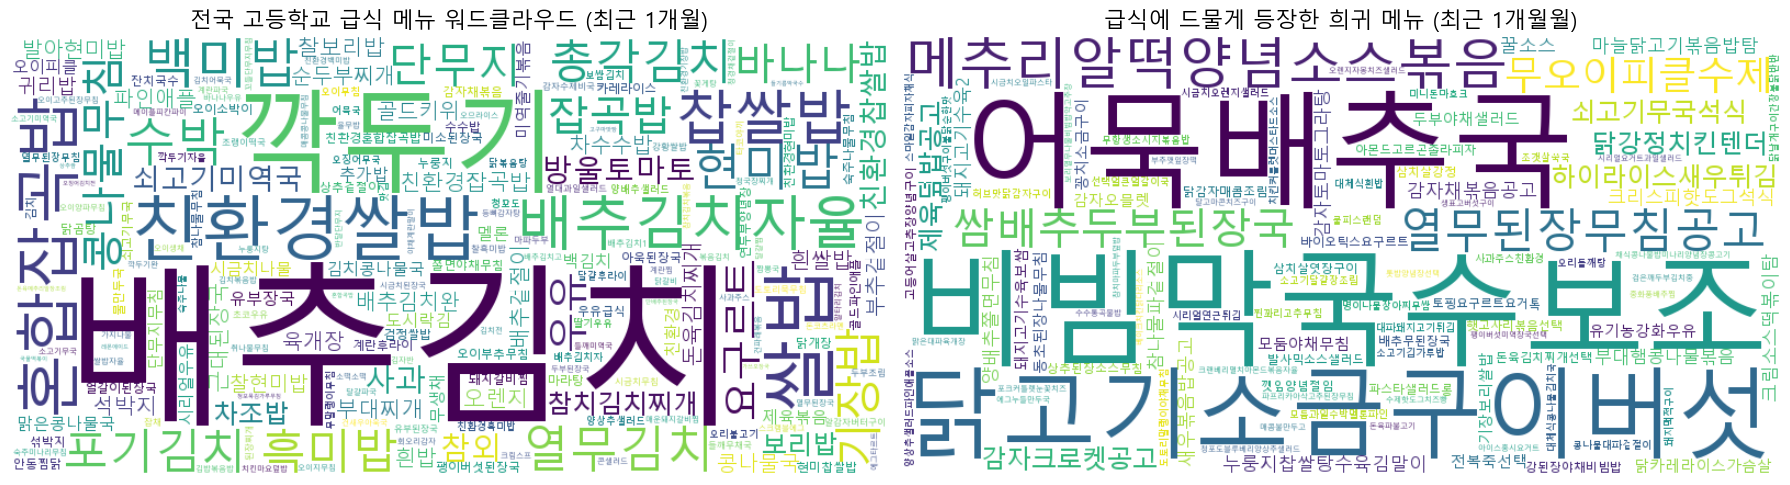

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 
def preprocess_menu_text(text_series):
    text_series = text_series.dropna().str.replace("<br/>", " ").str.replace("<br />", " ")
    words = text_series.str.split().explode()
    words = words[~words.str.contains(r"^\(.*\)$")]
    words = words.str.replace(r"[^\uAC00-\uD7A3a-zA-Z0-9]", "", regex=True)
    words = words[words.str.len() > 1]
    return words

# 데이터 전처리 및 빈도 계산
words = preprocess_menu_text(df["급식식단"])
freq_dict = Counter(words)
rare_menus = dict(Counter(words).most_common()[::-1][:100])

# 워드클라우드 생성
wordcloud_common = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # 맑은 고딕 폰트 적용
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(freq_dict)

wordcloud_rare = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # 맑은 고딕 폰트 적용
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(rare_menus)

# ▶ 1x2 형태 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'  # 전역 폰트 설정
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(wordcloud_common, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("전국 고등학교 급식 메뉴 워드클라우드 (최근 1개월)", fontsize=16)

axes[1].imshow(wordcloud_rare, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("급식에 드물게 등장한 희귀 메뉴 (최근 1개월월)", fontsize=16)

plt.tight_layout()
plt.show()